# Understanding the results of a vaccine study

**BioNTech and Pfizer** developed a mRNA based vaccine that is highly effective in preventing COVID-19. Their research was published in an article in **[the New England Journal of Medicine](https://www.nejm.org/)** titled *[Safety and Efficacy of the BNT162b2 mRNA Covid-19 Vaccine](https://www.nejm.org/doi/full/10.1056/nejmoa2034577)*. In the article, they talk in detail about their research methodology and outcome of the study.

From the result section we can get the data below,


| Group| Participant| Infected|
| :----: | :----: | :----: |
| Treatment| 21,720| 8|
| Control| 21,728| 162|

How do we make a decision based on those numbers that the vaccine is effective in preventing infection? We can do a hypothesis test to check that assumption. 

# Hypothesis Test:
The goal of the study is to test the effectiveness of the vaccine. So, they divide the participant in two group: 1. Treatment Group, 2. Control Group. Treatment group are the participant who were assigned to recieve the vaccine and control group were assigned to receive the placebo.
A Hypothesis test is a process where observed data from a study is modeled as some random numbers following some probability distribution. Since control group is the status quo, we take the distribution based on them. Then we check to see what is the probability that the treatment outcome has happened because of random behavior. We set a threshold or significance level. If it is below the threshhold, we say that the effect of the treatment is statistically significant.
Let's do the hypotheis test following the steps below, 
1. Determine a model,
2. Determine a null hypothesis and alternative hypothesis,
3. Determine a test statistic,
4. Determine a significance level

I will discuss and explain briefly all the steps below.


## 1. Determine a model:
We can assume that each participant from a group being infected is independent of other participants.
We can model each participant being infected $(X =1)$ or not $(X =0)$ as $X_1,X_2,......X_n~$ [Bernoulli random variable](https://en.wikipedia.org/wiki/Bernoulli_distribution) with a probability ($\pi$). Here the $\pi$, means the probability of a particient being infected. We can take $\pi_0$ as the probability of a participant from the control group being infected and $\pi_1$ as the probability of a participant from the treatment group being infected.  With this model, we have to find the Null hypothesis and Alternative hypothesis for our test. 

## 2. Determine a null hypothesis and alternative hypothesis:
Since we modeled each participant being infected as Bernoulli, the total number of infected people can be modeled as $Y = X_1+X_2+......X_n$ ~ Binomial(n, $\pi$) random variable. From the data we can estimate the $\pi = \frac{162}{21728} = 0.00746$. We have to find out if treatment reduces the probability of being infected. Our null hypothesis will be that it does not reduce the probability of being infected in the treatment group or $\pi_1=0.00746$. Our alternative hypothesis will be that it does reduce the probability of being infected in the treatment group $\pi_1 <0.00746$.

**Null Hypothesis, $H_0 : \pi_1 = 0.00746$**

**Alternative Hypothesis, $H_1 : \pi_1 < 0.00746$**

In [1]:
import numpy as np
from scipy.stats import binom

## 3. Determine a test statistic:

The test statistics here is the total infection in the treatment group. Since each participant being infected was modeled as Bernoulli random number, total number of infected people in each group is a Binomial Random number. Here the test statistics is,

$T\rightarrow X_1+X_2+....+X_n=8$

In [2]:
numbers = range(0,250) 
binom_dist = [binom.pmf(i, 21728, 0.00746) for i in numbers]

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

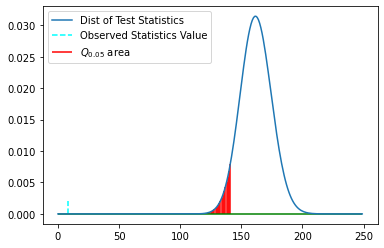

In [27]:
sns.lineplot(x= numbers, y=binom_dist)
plt.vlines(8, ymin = 0, ymax= 0.002, colors='cyan', linestyles='dashed')

for i in range(int(binom.ppf(0.05, 21728, 0.00746)) ):
    plt.vlines(i,ymin=0, ymax=binom.pmf(i, 21728, 0.00746), color='r')
    

plt.hlines(0, xmin = min(numbers), xmax=max(numbers), colors='g')
plt.legend(['Dist of Test Statistics', 'Observed Statistics Value', '$Q_{0.05}$ area']);

## 4. Determine a significance level:
The significance level is the amount of error that will be allowed in the experiment. Here we take significance level, $\alpha = 0.05$.
This means that test statistics that falls in the quantile less than the 0.05, will reject the null hypothesis.

In [5]:
print('q_0.05 is at ',binom.ppf(0.05, 21728, 0.00746))

q_0.05 is at  142.0


This means that anything that is lower than this number will be enough to reject the Null Hypothesis.

## Test:

From the treatment group data we can see that
The test statistics value is much smaller than the $q_{0.05}$. We can safely reject the null hypothesis.

In [6]:
binom.cdf(8, 21728, 0.00746) 

2.8881564575936483e-58